# Regresion lineal simple Python

## Implementación de librería statsmodel

In [1]:
import pandas as pd
data = pd.read_csv("/Users/milan/OneDrive/Documentos/python-ml-course-master/datasets/ads/Advertising.csv")

In [2]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
import statsmodels.formula.api as smf

La función .ols() de statsmodels permite generar una regresión lineal entregando todos los datos relacionados a las 
formulas del modelo matematico. .fit() ajusta los datos del modelo para entregar las estadisticas básicas.

In [4]:
lm= smf.ols(formula="Sales~TV",data=data).fit()
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

Dentro de la formula de Ye para un modelo de regresión lineal, la intercepción sería el ALFA y BETA sería la formula que interacciona con X. Por lo que siguiendo esto y con los parametros de la variable lm nos encontramos con la siguiente formula:

* Ye = 7.032594 + 0.047537 * TV

Siguiendo la lógica del dataset de publicidad, por cada 1000 euros adicionales que se invierten en publicidad por la TV se incrementan las ventas de productos en 0.047537 adicional.

Los P Valores de cada parametro son variables que recuperan mediante .fit(), y por tanto si establecemos hipotesis podemos ver si estos valores tienen una significancia entre si. Para este caso los p muy bajos, y como se juega la hipotesis de que beta es 0, podemos indicar que estas variables poseen una relación fuerte.

In [5]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Tambien es posible obtener la R^2 y determinar que tan perfecta es la formula para predecir los datos observados en base a la formula. También se puede usar R^2 Ajustado que es una formula que permite hacer el mismo calculo con un ajuste de corrección 

In [6]:
lm.rsquared, lm.rsquared_adj

(0.611875050850071, 0.6099148238341623)

Función .summary() entregará el resumen de todas las estadísticas del modelo.

In [7]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.47e-42
Time:                        19:00:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### .predict() es una función aplicacle a un modelo generado con statsmodels para predicir valores usando la formula Ye.

Se le tiene que entregar un dataset de x Cantidad de valores del mismo orden que evalua el modelo, en este caso dinero invertido en TV. Como resultado entregará un dataset del mismo largo con valores predictivos.

Este modelo en particular espera dinero invertido en publicidad para indicar la cantidad de ventas generadas.

In [8]:
lm_predict=lm.predict(pd.DataFrame(data["TV"]))
lm_predict

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [9]:
import matplotlib.pyplot as plt
import numpy as np

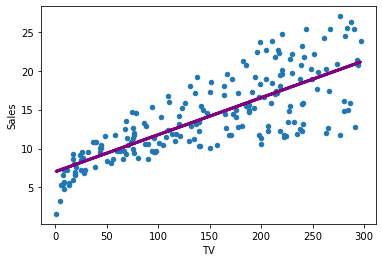

In [10]:
data.plot(kind="scatter", x= "TV", y="Sales")
plt.plot(pd.DataFrame(data["TV"]),lm_predict, c="purple", linewidth=3)

### Ejercicio de validación del Modelo

In [11]:
# Agregamos la Ye de cada variable según la X/invertido en TV
data["Sales_predict"]=7.032594 + 0.047537*data["TV"]

In [12]:
# Error realtivo estandar
data["RSE_DATA"]= (data["Sales"]-data["Sales_predict"])**2
SSD= sum(data["RSE_DATA"])
## recordar que la formula del RSE incluye el numero de muestras - el numero de variables evaluadas.
RSE= np.sqrt(SSD/(len(data)-2))
RSE
print("Se genera un error de "+str(RSE)+" de diferencia a la hora de predecir las ventas")
print("Este error equivale a que el modelo es incapaz de validar el "+str((RSE/np.mean(data["Sales"]))*100)+"% de los casos")

Se genera un error de 3.258656369238098 de diferencia a la hora de predecir las ventas
Este error equivale a que el modelo es incapaz de validar el 23.23876890168014% de los casos


(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

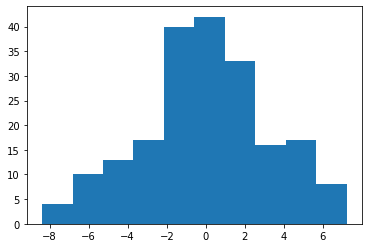

In [13]:
plt.hist(data["Sales"]-data["Sales_predict"])

Se puede observar que la diferencia entre las predicciones y las ventas observadas se distibuyen en una normal.

-------------------------
# Regresión lineal múltiple

Distintas regresiones que se puede hacer con los datos actuales:
* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV - Newspaper
* Sales ~TV - Radio
* Sales ~Newspaper - Radio
* Sales ~TV - Newspaper - Radio

Sabiendo que dentro del los datos Newspaper y Radio no tienen un impacto mayor que TV, se descartan los modelos que no incluyan TV entre sus variables dependientes.

In [14]:
lm2 = smf.ols(formula="Sales~TV+Newspaper", data=data).fit()
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

Como se puede observar las funciones y variables siguen operando con normalidad y anidan los datos por cada variable dependiente.

La formula resultante sería:

* Ye(Sales)= 5.774948 + 0.046901 * TV + 0.044219 * Newspaper

Esto tambien aplica a sus p valores.

In [15]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Al igual que el modelo anterior donde solo estaba TV, las variables se encuentran tan lejos de la hipotesis que es imposible de que BETA sea 0.

In [16]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           3.95e-45
Time:                        19:00:51   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Se observa una leve mejora en el r^2 de los modelos, pasando de 60% de solo TV a 64% en el TV-Newspaper

Se pasara usar las ventas basadas en el modelo predictivo

In [17]:
lm2_predict = lm2.predict(data[["TV","Newspaper"]])
## Se intenta obtener el RSE(Error estandar de los residual) del modelo para ver la diferencia con el anterior
SSD_lm2= sum((data["Sales"]-lm2_predict)**2)
## recordar que la formula del RSE para regresión lineal múltiple incluye el numero de variables predictoras.
RSE_lm2= np.sqrt(SSD_lm2/(len(data)-2-1))

print("Se genera un error de "+str(RSE_lm2)+" de diferencia a la hora de predecir las ventas con el modelo TV-Newspaper")
print("Este error equivale a que el modelo es incapaz de validar el "+str((RSE_lm2/np.mean(data["Sales"]))*100)+"% de los casos")

Se genera un error de 3.120719860252885 de diferencia a la hora de predecir las ventas con el modelo TV-Newspaper
Este error equivale a que el modelo es incapaz de validar el 22.255089037282115% de los casos


______________________________________

## Regresión lineal de TV - Radio

In [18]:
lm3 = smf.ols(formula="Sales~TV+Radio", data=data).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           4.83e-98
Time:                        19:00:52   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Recuperar el RSE de TV - Radio

In [19]:
lm3_predict = lm3.predict(data[["TV","Radio"]])
## Se intenta obtener el RSE(Error estandar de los residual) del modelo para ver la diferencia con el anterior
SSD_lm3= sum((data["Sales"]-lm3_predict)**2)
## recordar que la formula del RSE para regresión lineal múltiple incluye el numero de variables predictoras - 1.
RSE_lm3= np.sqrt(SSD_lm3/(len(data)-2-1))

print("Se genera un error de "+str(RSE_lm3)+" de diferencia a la hora de predecir las ventas con el modelo TV-Radio")
print("Este error equivale a que el modelo es incapaz de validar el "+str((RSE_lm3/np.mean(data["Sales"]))*100)+"% de los casos")

Se genera un error de 1.6813609125080013 de diferencia a la hora de predecir las ventas con el modelo TV-Radio
Este error equivale a que el modelo es incapaz de validar el 11.990450436855062% de los casos


_______________________

#### Modelo de TV - Radio - Newspaper

In [20]:
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data=data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.58e-96
Time:                        19:00:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Se observa como en relación a las otras variables el coeficiente de Newspaper en casi 0 y negativo, inclusive el Pvalor es bastante alto entrando en el rango de la hipotesis de 0. Por lo que se puede denotar que en comparación a Radio y TV, Newspaper es contraproducente para el modelo y puede ser retirado.

___________________-

### RSE de TV - Radio - Newspaper

In [21]:
lm4_predict = lm4.predict(data[["TV","Radio","Newspaper"]])
## Se intenta obtener el RSE(Error estandar de los residual) del modelo para ver la diferencia con el anterior
SSD_lm4= sum((data["Sales"]-lm4_predict)**2)
## recordar que la formula del RSE para regresión lineal múltiple incluye el numero de variables predictoras - 1.
RSE_lm4= np.sqrt(SSD_lm3/(len(data)-3-1))

print("Se genera un error de "+str(RSE_lm4)+" de diferencia a la hora de predecir las ventas con el modelo TV-Radio")
print("Este error equivale a que el modelo es incapaz de validar el "+str((RSE_lm4/np.mean(data["Sales"]))*100)+"% de los casos")

Se genera un error de 1.6856446415208188 de diferencia a la hora de predecir las ventas con el modelo TV-Radio
Este error equivale a que el modelo es incapaz de validar el 12.020999404676902% de los casos


**Se observa que incluso el RSE sube al agregar la variable de Radio al modelo, haciendo que el modelo de 3 variables sea menos capaz de predecir variables. Aunque se trate de 1 %.**

_____________________________

### Multicolinealidad

Si el resultado es igual a:

- VIF =1, la correlación es baja y no afecta al modelo
- VIF < 5, la correlación es moderada y se puede quedar el dato en el modelo
- VIF > 5, la correlación es demasiado alta y la variable debe ser removida.

* VIF= 1/(1-R^2)

In [28]:
lm_n = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsquare_n = lm_n.rsquared
VIF_n = 1/(1-rsquare_n)
lm_tv = smf.ols(formula="Newspaper~TV+Radio", data=data).fit()
rsquare_tv = lm_tv.rsquared
VIF_tv = 1/(1-rsquare_tv)
lm_r = smf.ols(formula="Radio~TV+Newspaper", data=data).fit()
rsquare_r = lm_r.rsquared
VIF_r = 1/(1-rsquare_r)
VIF_n, VIF_tv ,VIF_r

(1.0046107849396502, 1.145187378723929, 1.1449519171055351)

**Se puede ver que al tener valores cercanos el VIF de Radio y Newspaper tienen cierta multicolinealidad, pero no así la TV la cual es muy cercana a 1.**

**Del analisís general podemos determinar que no existe una gran diferencia entre los modelos de 3 variables con el modelo lm_3(Sales~TV-Radio), por lo que se considera entre todos los disponibles el más apto**